**Unzipping a zip file**

In [ ]:
!gdown --id 13zfA2vhyLlTk78T9LlkRP0obdRtSt6fn

Downloading...
From: https://drive.google.com/uc?id=13zfA2vhyLlTk78T9LlkRP0obdRtSt6fn
To: /content/Newsgroups.zip
100% 27.2M/27.2M [00:00<00:00, 31.4MB/s]


In [ ]:
!unzip /content/Newsgroups.zip

Streaming output truncated to the last 5000 lines.
  inflating: 20_newsgroups/soc.religion.christian/20362  
  inflating: 20_newsgroups/soc.religion.christian/20363  
  inflating: 20_newsgroups/soc.religion.christian/20364  
  inflating: 20_newsgroups/soc.religion.christian/20365  
  inflating: 20_newsgroups/soc.religion.christian/20487  
  inflating: 20_newsgroups/soc.religion.christian/20488  
  inflating: 20_newsgroups/soc.religion.christian/20489  
  inflating: 20_newsgroups/soc.religion.christian/20490  
  inflating: 20_newsgroups/soc.religion.christian/20491  
  inflating: 20_newsgroups/soc.religion.christian/20492  
  inflating: 20_newsgroups/soc.religion.christian/20493  
  inflating: 20_newsgroups/soc.religion.christian/20494  
  inflating: 20_newsgroups/soc.religion.christian/20495  
  inflating: 20_newsgroups/soc.religion.christian/20496  
  inflating: 20_newsgroups/soc.religion.christian/20497  
  inflating: 20_newsgroups/soc.religion.christian/20498  
  inflating: 20_newsg

**Importing libraries**

In [ ]:
import os
import pandas as pd

**Getting categories in a list**

In [ ]:
categories = list(os.listdir('/content/20_newsgroups'))

**Fetching content of documents in file_contents**

In [ ]:
file_contents = []
category_col = []
for category in categories:
  file_names = list(os.listdir(f'/content/20_newsgroups/{category}'))
  for file_name in file_names: 
    try: 
      #f = open(f'/content/20_newsgroups/{category}/{file_name}')
      with open(f'/content/20_newsgroups/{category}/{file_name}', 'r') as file:
        f = file.read().replace('\n', '')
      file_contents.append(f)
      category_col.append(category)
    except: print(file_name)

104471
104562
104352
104984
104474
104572
104419
66923
66871
67305
68001
82776
83777
83651
103694
103725
103700
101596
38489
38568
38757
38490
38291
61293
61534
61556
54769
53879
54042
54000
54516
54036
60868
61116
60498
60366
60936
15672
51060
52909
54163
49960
54164
52499
52910
53803
54071
54485
53883
53721
54070
51892
52164
51593
51917
51941
52165
51592
52196
51591
51865
52033
51594
50467
51904
51916
59239
59055
59535
76548
76361
76843
76112


**Creating DataFrame**

In [ ]:
df = pd.DataFrame(category_col)
df["Content"] = file_contents
df.rename(columns = {0: 'Categories'}, inplace = True)

**Text Preprocessing**

In [ ]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Stopwords**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

**Punctuations**

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

**Stemming**

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

**A function named transform_text to remove stopwords, remove punctuations and apply stemming**

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
df['transformed_text'] = df['Content'].apply(transform_text)

In [ ]:
df

,Categories,Content,transformed_text
0,rec.sport.baseball,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path savi savastanfrom savastan paul savastano...
1,rec.sport.baseball,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path caen jbrownfrom jbrown jefferi brown news...
2,rec.sport.baseball,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path ogics emori gatech prism gt0523efrom gt05...
3,rec.sport.baseball,Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...,path rochest udel uvaarpa csc2imdnewsgroup csc...
4,rec.sport.baseball,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path ogics linac uchinew kimbark thf2from thf2...
...,...,...,...
19919,misc.forsale,Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...,path rochest udel field jonathan david field n...
19920,misc.forsale,Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...,path rochest udel gatech concert ecsgat box ch...
19921,misc.forsale,Xref: cantaloupe.srv.cs.cmu.edu misc.wanted:31...,xref gatech swrind onghfrom ongh calvin n hobb...
19922,misc.forsale,Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...,path rochest udel gatech kd4nc vdbsan willard ...


In [ ]:
df1=df
df1

**Label Encoder for encoding categories**

In [ ]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['encoded_category']= label_encoder.fit_transform(df['Categories'])
df['encoded_category'].unique()
df

,Categories,Content,transformed_text,encoded_category
0,rec.sport.baseball,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path savi savastanfrom savastan paul savastano...,9
1,rec.sport.baseball,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path caen jbrownfrom jbrown jefferi brown news...,9
2,rec.sport.baseball,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path ogics emori gatech prism gt0523efrom gt05...,9
3,rec.sport.baseball,Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...,path rochest udel uvaarpa csc2imdnewsgroup csc...,9
4,rec.sport.baseball,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path ogics linac uchinew kimbark thf2from thf2...,9
...,...,...,...,...
19919,misc.forsale,Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...,path rochest udel field jonathan david field n...,6
19920,misc.forsale,Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...,path rochest udel gatech concert ecsgat box ch...,6
19921,misc.forsale,Xref: cantaloupe.srv.cs.cmu.edu misc.wanted:31...,xref gatech swrind onghfrom ongh calvin n hobb...,6
19922,misc.forsale,Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...,path rochest udel gatech kd4nc vdbsan willard ...,6


**Data Visualization**

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

**Wordcloud generation of category0**

In [ ]:
category0 = wc.generate(df[df['encoded_category'] == 0]['transformed_text'].str.cat(sep=" "))

In [ ]:
import matplotlib.pyplot as plt

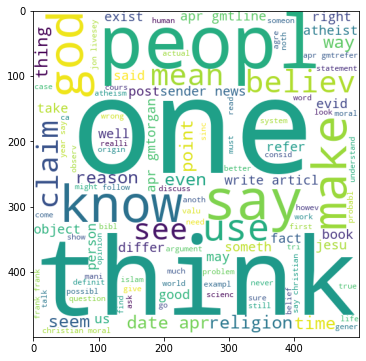

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(category0)

In [ ]:
category0_corpus = []
for msg in df[df['encoded_category'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        category0_corpus.append(word)

In [ ]:
len(category0_corpus)

157695

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


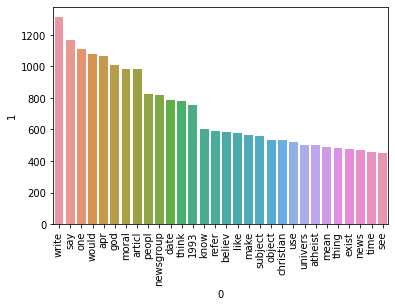

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(category0_corpus).most_common(30))[0],pd.DataFrame(Counter(category0_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

**Pie chart visualization of no. of documents in each categories**

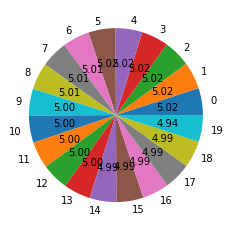

In [ ]:
plt.pie(df['encoded_category'].value_counts(), labels=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19'], autopct="%0.2f")
plt.show()

**Normal training of model( direct spliiting into train and test)**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(19919, 3000)

In [ ]:
y = df['encoded_category'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1, average='macro'))

0.6362951807228916
[[165   0   1   1   0   0   1   1   0   1   2   0   2   4   0   4   3   1
    4  24]
 [  0  71  23   9  16  47   3   0   0   2   1   4   2   1   5   0   0   2
    0   0]
 [  0   6  98  39  20  28   6   0   0   1   0   7   5   0   5   0   0   0
    1   1]
 [  0   5   8 117  24   7   6   2   0   0   1   1   7   0   1   0   0   1
    0   0]
 [  1   9   5  24 120   5   9   0   1   0   0   2  13   2   3   0   0   0
    0   0]
 [  0  22   9   4  10 145   3   1   0   1   0   2   4   2   2   0   1   0
    0   0]
 [  0   3   5  28  26   2 107   7   4   5   1   3   7   4   8   0   1   1
    2   0]
 [  1   0   3   1   8   4  12 115  21   4   0   1  10   1   4   0   9   2
    4   6]
 [  0   0   1   1   3   1  13  19 126   1   0   0   6   3   0   0   1   2
    5   3]
 [  0   0   1   1   0   2   2   3   2 160  12   0   3   6   7   0   1   2
    7   0]
 [  0   0   1   0   0   0   3   2   2  10 189   1   0   1   1   0   2   0
    3   0]
 [  1   1   3   1   2   0   1   2   2   2   0 

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2, average='macro'))

0.8127510040160643
[[168   1   0   0   0   0   0   2   2   0   0   0   2   2   1   9   2   4
    1  20]
 [  1 142   8   8   4  10   2   0   0   1   1   4   1   2   0   0   0   2
    0   0]
 [  0  16 158  13   2  20   3   1   1   0   1   0   1   0   1   0   0   0
    0   0]
 [  0   4   6 138  10   4   7   0   0   0   0   0   9   1   1   0   0   0
    0   0]
 [  0   4   9  13 152   0   8   3   0   0   0   0   4   0   0   0   0   0
    1   0]
 [  0  16   9   4   1 171   1   1   0   0   0   1   2   0   0   0   0   0
    0   0]
 [  0   5   4  11   7   0 164  12   1   3   0   0   7   0   0   0   0   0
    0   0]
 [  0   1   0   0   0   1   5 177   9   1   1   1   5   1   1   0   1   1
    1   0]
 [  0   1   0   1   1   0   6   3 170   1   0   0   0   1   0   0   1   0
    0   0]
 [  3   1   1   1   0   0   3   1   0 194   5   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   3   0   1 210   0   0   0   0   0   0   0
    0   1]
 [  0   3   2   1   0   1   0   2   1   0   0 

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3, average='macro'))

0.7083333333333334
[[162   0   1   0   8   0   9   1   6   2   0   0   1   2   1   1   0   4
    2  14]
 [  2 123  10   9   5  10  22   0   0   1   0   1   1   1   0   0   0   0
    1   0]
 [  0  13 147  12   4  12  24   0   1   0   0   2   1   0   1   0   0   0
    0   0]
 [  0   3   7 124  13   2  22   2   0   0   0   2   4   0   0   0   0   0
    1   0]
 [  0   5   5  15 139   1  19   2   0   0   0   0   7   0   1   0   0   0
    0   0]
 [  0  14  11   4   4 154  15   0   0   0   0   2   1   1   0   0   0   0
    0   0]
 [  0   5   4   3   3   0 186   4   1   0   0   1   4   1   0   0   1   1
    0   0]
 [  0   1   0   1   7   1  28 144   9   0   1   0   5   0   0   0   1   0
    8   0]
 [  0   0   0   0   1   0  21   6 152   0   0   0   0   1   0   0   1   1
    2   0]
 [  2   1   0   0   0   0  21   1   0 178   4   0   0   0   0   0   0   0
    2   0]
 [  0   0   0   0   2   0  15   0   2   5 188   0   0   0   0   0   1   0
    1   1]
 [  0   4   5   0   7   2   9   0   0   0   0 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred, average='macro')
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.8315763052208835, 0.8373999870638343)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8315763052208835
Precision -  0.8373999870638343
For  KN
Accuracy -  0.7525100401606426
Precision -  0.758190230223818
For  NB
Accuracy -  0.8127510040160643
Precision -  0.8152206693449683


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  DT
Accuracy -  0.19603413654618473
Precision -  0.250181974445422
For  LR
Accuracy -  0.7926706827309237
Precision -  0.7961056857776735
For  RF
Accuracy -  0.757781124497992
Precision -  0.7634188634444304


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  AdaBoost
Accuracy -  0.09236947791164658
Precision -  0.07725951374207188
For  BgC
Accuracy -  0.7120983935742972
Precision -  0.7204353387525293
For  ETC
Accuracy -  0.7991967871485943
Precision -  0.8023873988386852
For  GBDT
Accuracy -  0.7497489959839357
Precision -  0.7658950717326674
For  xgb
Accuracy -  0.7351907630522089
Precision -  0.7538261036465417


**Code for skipgram( for detecting phrases)**

In [ ]:
df = df.drop('Content',axis=1)
df

,Categories,transformed_text,encoded_category
0,rec.sport.baseball,path savi savastanfrom savastan paul savastano...,9
1,rec.sport.baseball,path caen jbrownfrom jbrown jefferi brown news...,9
2,rec.sport.baseball,path ogics emori gatech prism gt0523efrom gt05...,9
3,rec.sport.baseball,path rochest udel uvaarpa csc2imdnewsgroup csc...,9
4,rec.sport.baseball,path ogics linac uchinew kimbark thf2from thf2...,9
...,...,...,...
19919,misc.forsale,path rochest udel field jonathan david field n...,6
19920,misc.forsale,path rochest udel gatech concert ecsgat box ch...,6
19921,misc.forsale,xref gatech swrind onghfrom ongh calvin n hobb...,6
19922,misc.forsale,path rochest udel gatech kd4nc vdbsan willard ...,6


In [ ]:
from keras.preprocessing import text

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(df['transformed_text'])

word2id = tokenizer.word_index
id2word = {v:k for k, v in word2id.items()}

vocab_size = len(word2id) + 1 
embed_size = 100

wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in df['transformed_text']]
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 195215
Vocabulary Sample: [('apr', 1), ('newsgroup', 2), ('write', 3), ('would', 4), ('one', 5), ('use', 6), ('1993', 7), ('date', 8), ('articl', 9), ('subject', 10)]


In [ ]:
from keras.preprocessing.sequence import skipgrams

# generate skip-grams
skip_grams = [skipgrams(wid, vocabulary_size=vocab_size, window_size=10) for wid in wids]

In [ ]:
# view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          id2word[pairs[i][0]], pairs[i][0], 
          id2word[pairs[i][1]], pairs[i][1], 
          labels[i]))